In [2]:
%matplotlib inline
%load_ext tensorboard.notebook

In [2]:
import sys
import os
os.chdir("..")

import numpy as np
from orientation_detection.CNN_module import get_CNN, load_CNN_model
from orientation_detection.render_images import get_images, get_train_val, show_images
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import time

Using TensorFlow backend.


In [11]:
root_logdir = os.path.join(os.curdir, "my_logs")
logdir = os.path.join(root_logdir, "run_{}".format(time.time()))

### Main Function to train model, and save the best model

In [7]:
def main_train_model(target_type,image_size,num_images,batch_size,epochs,model_filename):

    model = get_CNN(image_size,target_type)
    rendered_images = get_images(num_images,image_size)
    
    # convert into x_train, xVal, yTrain and yVal
    xTrain, xVal, yTrain, yVal= get_train_val(rendered_images,target_type)
    
    # Reshape the train and validation set
    len_train = len(xTrain)
    len_val = len(xVal)
    xTrain = np.array(xTrain).reshape(len_train,image_size,image_size,3)
    xVal = np.array(xVal).reshape(len_val,image_size,image_size,3)
        
    # setting callbacks
    callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=5),
    keras.callbacks.ModelCheckpoint(model_filename, save_best_only=True),
    ]
    
    # fit the model into training data
    history = model.fit(xTrain, yTrain,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xVal, yVal),
          callbacks = callbacks)
    
    print('Done')
    print(model.summary())
        
    return history


### Main Function to load trained model, and return predictions 

In [8]:
def main_get_prediction(target_type,model_filename,xTest, yTest):
    model = load_CNN_model(target_type,model_filename)
    test_evaluation = model.evaluate(xTest, yTest, verbose=1)
    print('Test loss/MSE:', test_evaluation)
    #print('Test accuracy:', test_evaluation[1])
    print('RMSE:',test_evaluation**0.5)
    
    # Run the prediction into test data
    predictions = model.predict(xTest)
    
    return predictions

In [9]:
def calculate_accuracy(y_true,y_pred):
    #normalize the y_pred
    vector1 = y_pred[:,:3]
    vector2 = y_pred[:,3:]
    num_row = y_pred.shape[0]

    normalized_vectors1 = np.divide(vector1,np.sqrt(np.sum(np.square(vector1),axis=1).reshape(num_row,1)))
    normalized_vectors2=  np.divide(vector2,np.sqrt(np.sum(np.square(vector2),axis=1).reshape(num_row,1)))

    normalized_predictions = np.concatenate((normalized_vectors1,normalized_vectors2),axis=1)
    
    mse = mean_squared_error(y_true, normalized_predictions)
    
    return mse,mse**0.5

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

## Run training model with vector orientations, and save model (This is what we currently use)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
Instructions for updating:
Use tf.cast instead.
Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 231s 26ms/step - loss: 0.5549 - val_loss: 0.2177
Epoch 2/10
9000/9000 [==============================] - 227s 25ms/step - loss: 0.2242 - val_loss: 0.1322
Epoch 3/10
9000/9000 [==============================] - 228s 25ms/step - loss: 0.1582 - val_loss: 0.0945
Epoch 4/10
9000/9000 [==============================] - 227s 25ms/step - loss: 0.1306 - val_loss: 0.0722
Epoch 5/10
9000/9000 [==============================] - 227s 25ms/step - loss: 0.1057 - val_loss: 0.0568
Epoch 6/10
9000/9000 [==============================] - 227s 25ms/step - loss: 0.0884 - val_loss: 0.0390
Ep

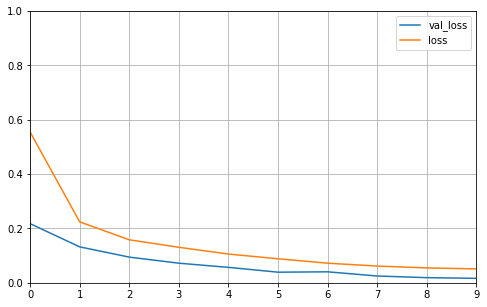

In [9]:
## set parameters
#batch_size defines the number of samples for one forward and back propagation
#epochs  is number of one forward pass and backward pass of all the training batches

target_type = 'vectorOrientations'
image_size = 64
num_images = 10000
batch_size = 50
epochs = 50

#filename for the name your module
model_filename = "trained_model/CNN_model_"+target_type+"10april"

#run the training and prediction
history = main_train_model(target_type,image_size,num_images,batch_size,epochs,model_filename)

#plot the learning_curves
plot_learning_curves(history)

#Save the history
#Change filename
history_filename = "training_history/history_CNN_10april"
import pickle
dict = history.history
f = open(history_filename,"wb")
pickle.dump(dict,f)
f.close()


## Run Prediction with selected model and show pair of images (test image and prediction)

In [5]:
#Getting the images for testing (on later stage should get images from Nil's module)
image_test = get_images(1000,64)
x_test = np.array(image_test['images'])
y_test = np.array([np.concatenate(x) for x in image_test['vectorOrientations']])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
1000/1000 [==============================] - 6s 6ms/step
Test loss/MSE: 0.016617374554276466
RMSE: 0.12890839598054296
Test data 0
true orientation=  [-0.68344772 -0.65346372  0.3253988   0.72469299 -0.5536967   0.41017074]
prediction orientation =  [-4917.2544 -3350.0964  2047.285   3110.4824 -3778.1187  1606.4475]


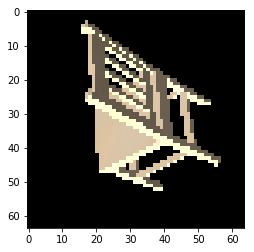

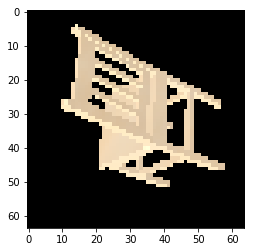

Test data 1
true orientation=  [ 0.54824986 -0.39957517  0.73468481 -0.81531627 -0.05974765  0.575925  ]
prediction orientation =  [ 9829.816 -8280.186 13459.117 -7760.581 -1745.274  4149.295]


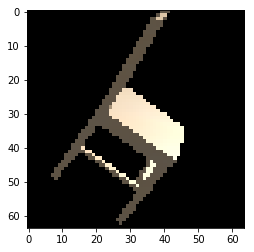

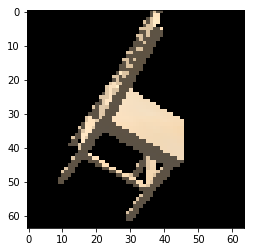

Test data 2
true orientation=  [-0.1164482   0.19368844 -0.97412761  0.06137214  0.98032919  0.18758503]
prediction orientation =  [-1880.3612   1511.8912  -7404.4277    623.4715  10672.34      183.99496]


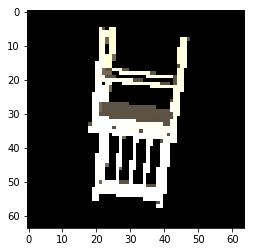

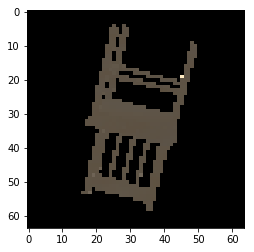

Test data 3
true orientation=  [-0.8087849  -0.10407806 -0.57882186  0.41369425  0.59885489 -0.68573311]
prediction orientation =  [-8709.208     703.4609  -5703.101    4795.599      97.39301 -9975.573  ]


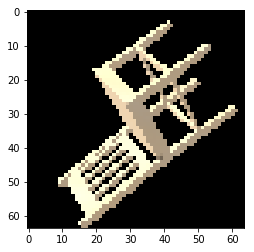

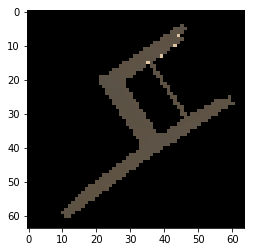

Test data 4
true orientation=  [-0.34022475  0.82311455 -0.45467522  0.936805    0.33860006 -0.0880136 ]
prediction orientation =  [-901.97125 1141.6271  -894.2058  2568.7483   576.6545  -505.64206]


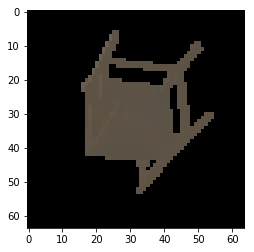

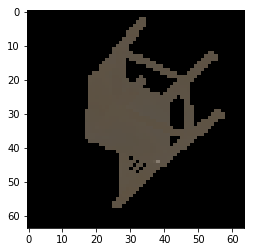

Test data 5
true orientation=  [ 0.19942521  0.51894345  0.83122036 -0.9777487   0.04903123  0.20396914]
prediction orientation =  [ 1134.2565   2785.7942   6113.7554  -3079.9846   -892.59406   566.62256]


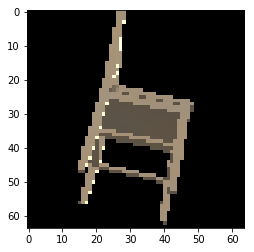

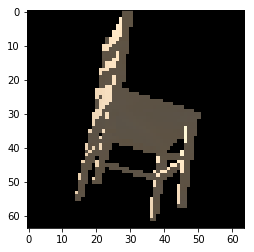

Test data 6
true orientation=  [-0.87063247  0.48265547  0.09509358 -0.35944829 -0.75613112  0.5468662 ]
prediction orientation =  [-6679.087   2587.6333   844.58   -1097.3293 -4742.97    1999.7214]


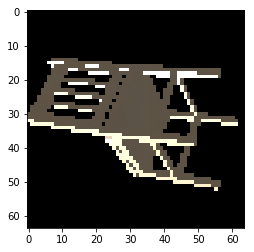

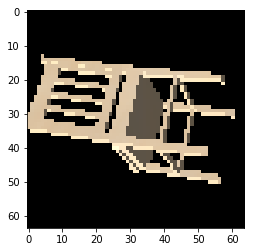

Test data 7
true orientation=  [-0.72112477  0.29606659  0.62635744  0.67399198  0.09054162  0.73316916]
prediction orientation =  [-11790.376      412.79086  10548.974     7615.3755   -3117.1365
   7693.5728 ]


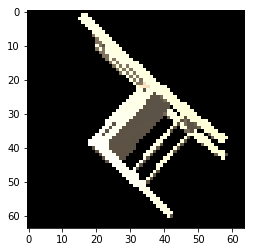

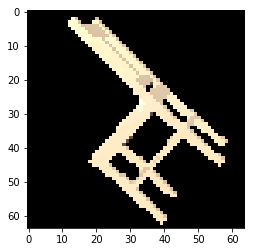

Test data 8
true orientation=  [ 0.11826804  0.77783396  0.61724144  0.2666448   0.57389605 -0.77430219]
prediction orientation =  [  617.7312  3436.5747  3088.561    902.9855  3154.1406 -3604.4858]


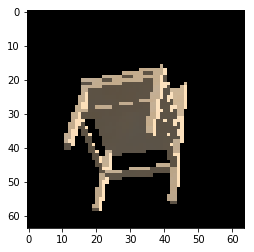

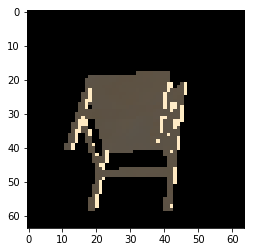

Test data 9
true orientation=  [-0.28374872  0.37865185  0.88097074  0.28179278  0.91109271 -0.30083701]
prediction orientation =  [-1611.668   2744.0742  6954.431    993.317   4546.3247 -2238.6125]


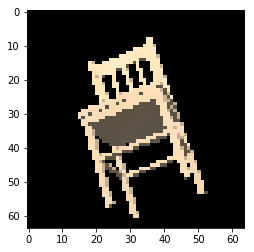

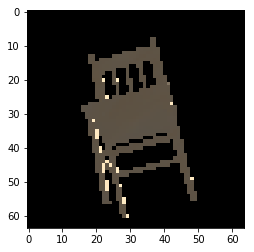

Test data 10
true orientation=  [ 0.09687967 -0.98293513  0.15637412 -0.39381012 -0.18214794 -0.90096377]
prediction orientation =  [ -944.8262  -6983.5923    396.68622 -1209.5177  -1123.4089  -4195.062  ]


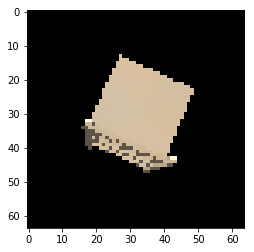

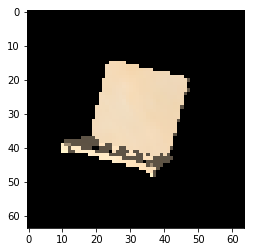

Test data 11
true orientation=  [ 0.47730967  0.50743009 -0.71741911  0.8743581  -0.35563813  0.33018091]
prediction orientation =  [ 4773.1606  2406.2993 -6302.439   7626.9277  1832.1699  6747.607 ]


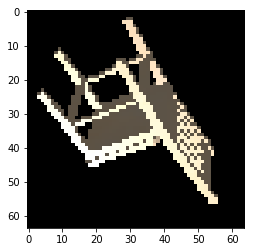

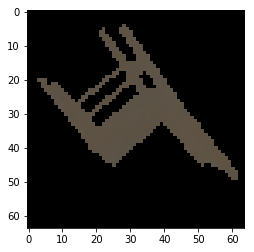

Test data 12
true orientation=  [-0.52178388 -0.68466422 -0.50889733  0.01988294 -0.60614119  0.7951085 ]
prediction orientation =  [-3414.639  -2763.3303 -2593.739    413.602  -3011.8435  2676.4233]


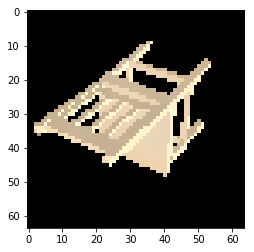

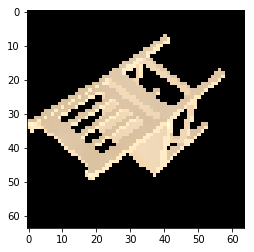

Test data 13
true orientation=  [ 0.42645927 -0.19408328 -0.88343883 -0.06054851 -0.98064256  0.18620967]
prediction orientation =  [ 2392.0872 -1156.7749 -3843.0852   278.3548 -2667.846    733.1582]


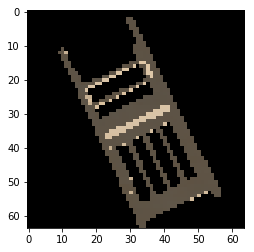

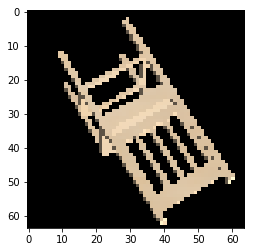

Test data 14
true orientation=  [ 0.65449195  0.27089303  0.7058734   0.22146046 -0.96134873  0.16359673]
prediction orientation =  [ 1857.5842    652.24225  2337.6711    364.36267 -1869.7994    319.32077]


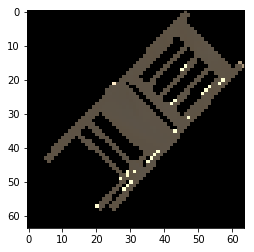

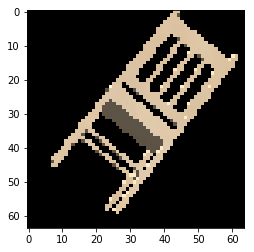

Test data 15
true orientation=  [ 0.20040901 -0.92968793  0.30905758 -0.87380185 -0.31227978 -0.37276221]
prediction orientation =  [  802.11346 -7620.9976   1185.3202  -5438.45    -1216.4353  -1792.7117 ]


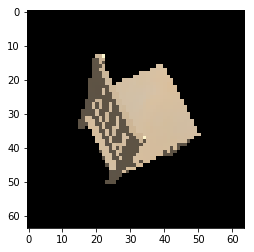

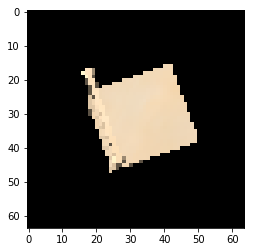

Test data 16
true orientation=  [-0.91192708 -0.26377519 -0.31434322  0.23161293 -0.96320722  0.13633528]
prediction orientation =  [-8800.808  -2827.0332 -1634.1936   625.1739 -4970.395   -124.8361]


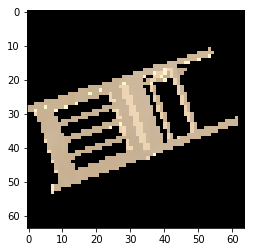

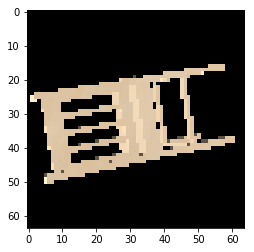

Test data 17
true orientation=  [-0.94535005  0.17932091 -0.27231835  0.3074925   0.21251558 -0.92751576]
prediction orientation =  [-5598.4062   981.0108  -868.9712  2113.8428  -208.316  -5673.1255]


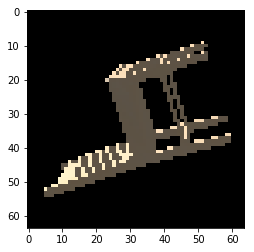

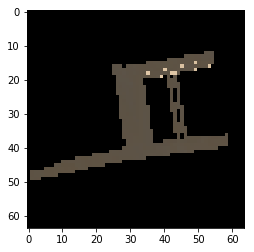

Test data 18
true orientation=  [-0.72161662 -0.67501822 -0.15368754  0.63118126 -0.55030298 -0.54660484]
prediction orientation =  [-5477.1074  -3921.5862    205.24432  4077.985   -4280.854   -5150.2163 ]


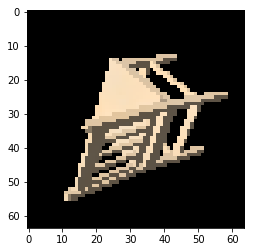

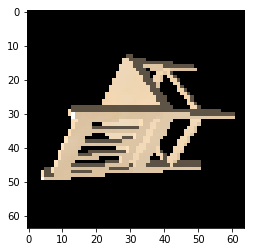

Test data 19
true orientation=  [-0.60667582  0.5379269   0.58530257 -0.7903084  -0.3286864  -0.51708595]
prediction orientation =  [-3148.0881   1433.8219   2505.6726  -2043.936    -973.94775 -1500.6982 ]


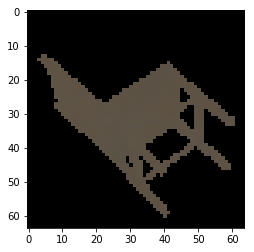

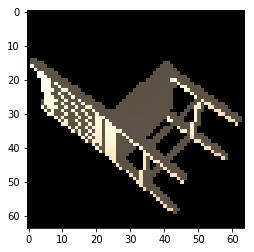

Test data 20
true orientation=  [-0.53416509  0.83517978 -0.13092897 -0.74479022 -0.3916568   0.54027074]
prediction orientation =  [-1040.6202   1754.8585   -254.65219 -1266.6824   -496.31543   328.35422]


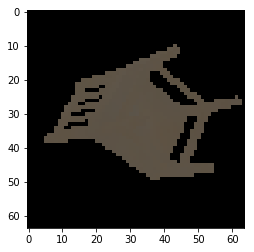

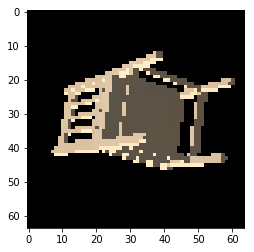

Test data 21
true orientation=  [-0.07025259 -0.99652414 -0.04476853  0.73296098 -0.08201007  0.67530923]
prediction orientation =  [  -14.104684 -3926.5862     729.2712    5104.5283     159.26714
  3565.4458  ]


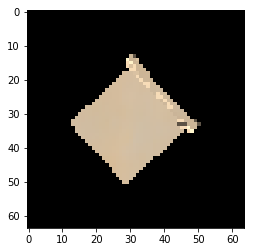

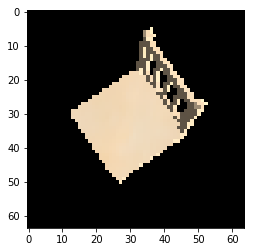

Test data 22
true orientation=  [ 0.53438431 -0.84507268  0.01689859 -0.29386915 -0.16700941  0.94114227]
prediction orientation =  [ 4299.296   -9599.9       550.9211  -4660.426    -542.86505 10161.605  ]


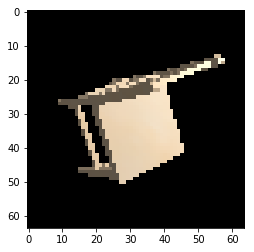

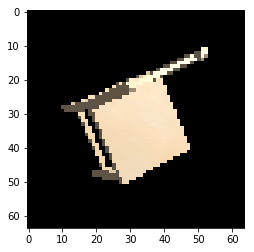

Test data 23
true orientation=  [ 0.54211546 -0.61173471  0.57610023 -0.48215043  0.33505457  0.80948712]
prediction orientation =  [  8291.552  -10036.661   10480.179   -5771.539    4754.4087  12566.846 ]


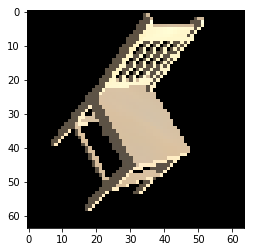

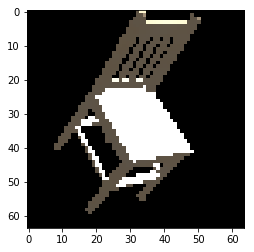

Test data 24
true orientation=  [ 0.8399265  -0.52091647 -0.15221531 -0.45505293 -0.82884098  0.32549879]
prediction orientation =  [ 4200.997    -2054.656      389.65466  -1457.4982   -1691.9607
    18.269491]


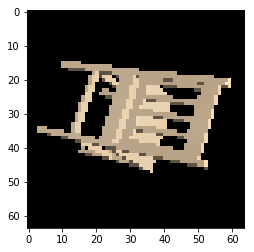

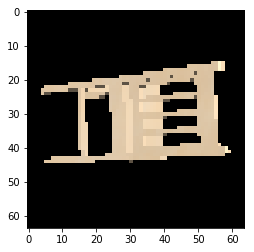

Test data 25
true orientation=  [-0.27317135  0.3116229   0.91009262 -0.95419423 -0.20778954 -0.21526001]
prediction orientation =  [-4532.4424   2487.5627   9614.054   -5626.0083   -496.35458 -2068.1707 ]


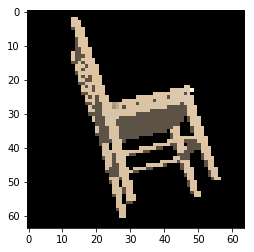

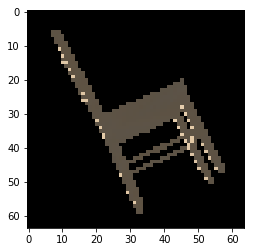

Test data 26
true orientation=  [ 0.55723799 -0.57143527 -0.60245128  0.60970703 -0.21095111  0.7640399 ]
prediction orientation =  [ 7442.01     -4843.969    -6115.0767    9843.151       36.337414
  9750.877   ]


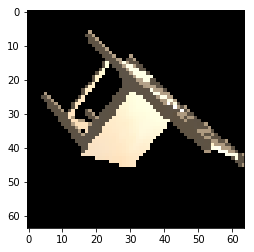

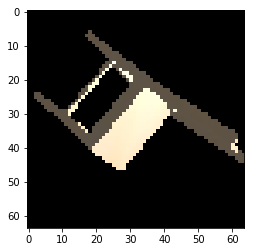

Test data 27
true orientation=  [-0.90431757  0.16368036 -0.3942315   0.33855085 -0.28748716 -0.89595449]
prediction orientation =  [-4997.7734   748.9043 -2760.0076  1593.0359 -1918.4852 -5012.288 ]


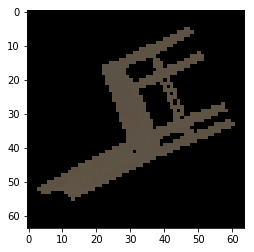

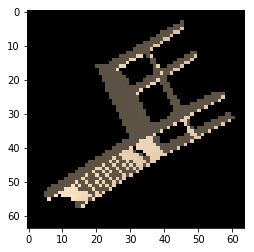

Test data 28
true orientation=  [-0.64403842  0.73202922  0.22214348 -0.0165688  -0.30366612  0.95263443]
prediction orientation =  [-4312.283   5580.8257  2436.505    327.9671 -1876.124   6824.02  ]


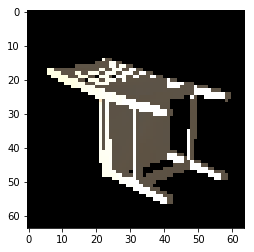

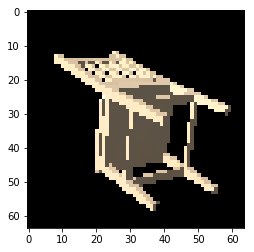

Test data 29
true orientation=  [ 0.9901067   0.05667486 -0.12836155  0.08523856 -0.96959764  0.22937919]
prediction orientation =  [ 7536.8643    333.8033  -1098.5845   1316.817   -6567.831     201.78957]


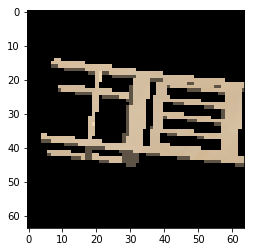

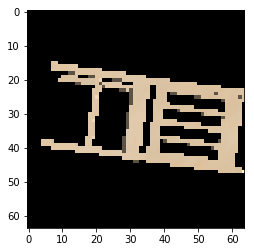

Test data 30
true orientation=  [ 0.27245286  0.85331167 -0.44455443 -0.95384659  0.1788995  -0.24118801]
prediction orientation =  [ 2003.5249   5944.379   -3477.4114  -6066.676     582.46497 -1626.2883 ]


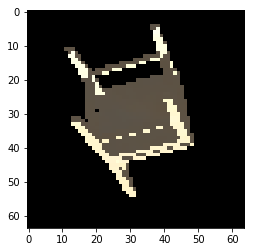

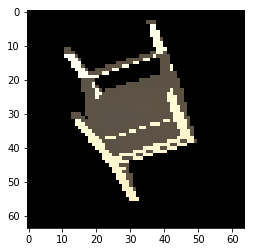

Test data 31
true orientation=  [ 0.23674243 -0.96892258  0.07170813  0.86510036  0.17663028 -0.4694711 ]
prediction orientation =  [  933.9594  -3892.179     691.21375  4698.3994   2175.0693  -3582.1155 ]


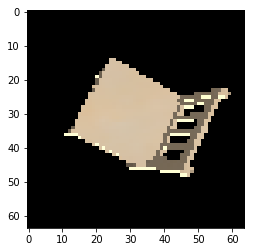

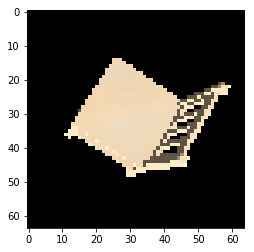

Test data 32
true orientation=  [ 0.74871131 -0.42149528  0.51163767 -0.38348054 -0.90496252 -0.18435157]
prediction orientation =  [ 6383.106  -4130.9946  4323.6787 -1773.2935 -4157.698  -1610.6471]


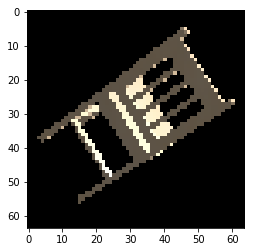

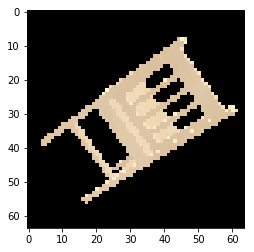

Test data 33
true orientation=  [-0.89245256  0.22129236  0.39313879  0.28533098  0.95187118  0.11192622]
prediction orientation =  [-6095.3667    405.93567  4110.1636   1119.1145   6832.49     -400.58908]


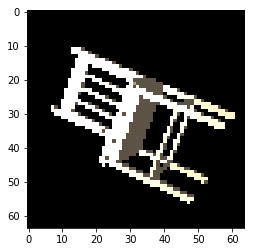

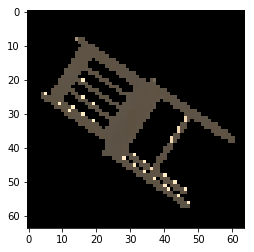

Test data 34
true orientation=  [-0.45929377  0.48633006 -0.74332517 -0.50970309 -0.82962939 -0.22785486]
prediction orientation =  [-2550.826   2554.9788 -4342.5747 -2176.4846 -3615.5642 -1411.4908]


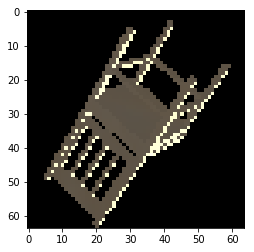

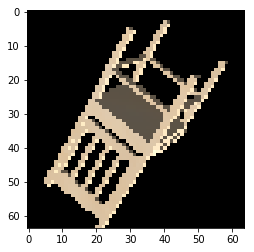

Test data 35
true orientation=  [-0.21060776  0.97362883  0.08769993 -0.66093493 -0.20791844  0.72106515]
prediction orientation =  [  -58.679283  1697.8578      76.551315 -1185.2094     -21.827488
   770.79333 ]


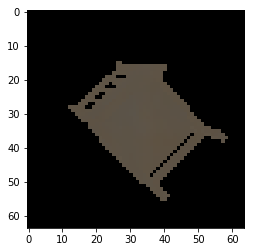

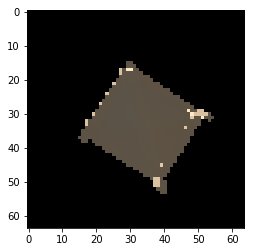

Test data 36
true orientation=  [-0.63393359  0.55941784 -0.53402236 -0.6997615  -0.12085435  0.70407959]
prediction orientation =  [-5242.5093  3664.269  -3944.206  -6169.953   -906.1994  5519.188 ]


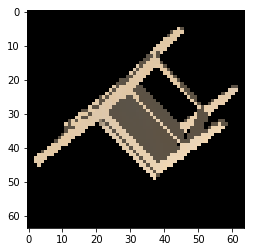

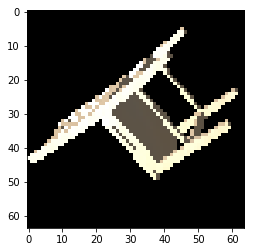

Test data 37
true orientation=  [-0.77311226  0.10814558 -0.62498157 -0.62988737 -0.01528398  0.77653609]
prediction orientation =  [-4311.012      -42.528656 -3847.9995   -4275.459    -1100.6132
  3568.4016  ]


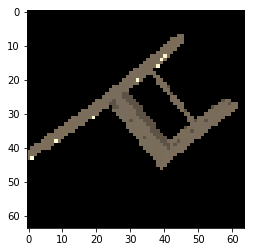

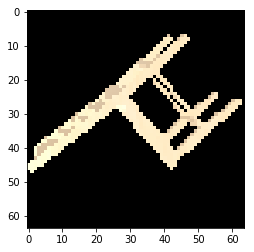

Test data 38
true orientation=  [ 0.41404754  0.89172403  0.18273723  0.26015913 -0.30830905  0.91502063]
prediction orientation =  [ 853.7321  1910.125    474.68448  580.0473  -780.78754 1790.8057 ]


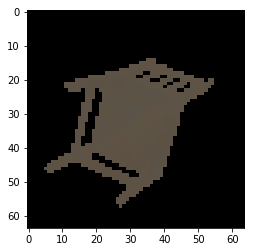

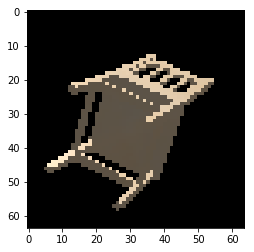

Test data 39
true orientation=  [ 0.03210161  0.50953216 -0.85985258 -0.76979578  0.56131081  0.30388259]
prediction orientation =  [ 1046.0813  2901.1792 -4802.1665 -4695.37    3292.7068  2193.8572]


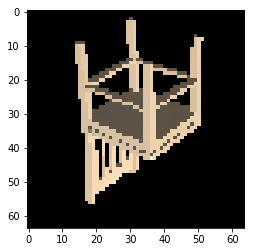

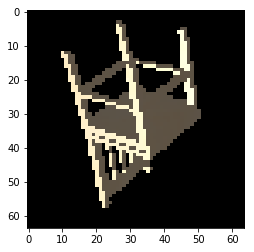

Test data 40
true orientation=  [ 0.18115909 -0.18656238 -0.96559612  0.92001244 -0.31478447  0.23342633]
prediction orientation =  [ 1426.341  -1603.1302 -8515.685  10366.017  -1255.2139  2188.647 ]


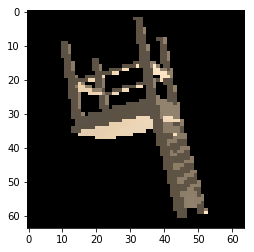

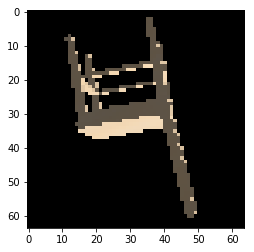

Test data 41
true orientation=  [ 0.35778407 -0.41033082  0.83882011  0.7780292  -0.36575855 -0.51077514]
prediction orientation =  [ 3306.3274 -3668.0059  8321.38    9034.401  -2488.263  -5050.221 ]


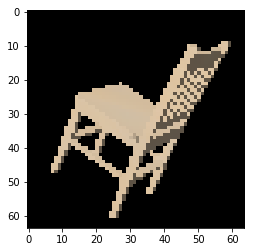

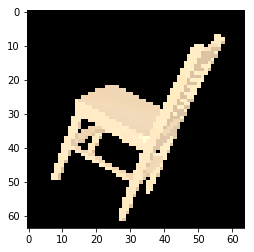

Test data 42
true orientation=  [-0.79753119  0.45739777  0.39335896  0.59697362  0.50434366  0.62390702]
prediction orientation =  [-5269.5635   1395.8405   2493.126    2428.9683    487.25076  3467.9973 ]


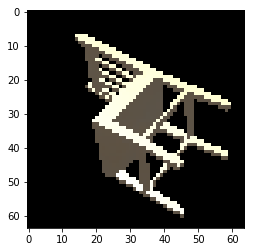

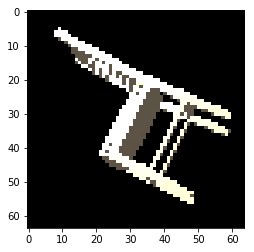

Test data 43
true orientation=  [ 0.82073327  0.03947533  0.56994613 -0.5155423  -0.37872969  0.76862212]
prediction orientation =  [ 6244.        652.70245  5497.7754  -2343.6902  -2742.4836   3121.617  ]


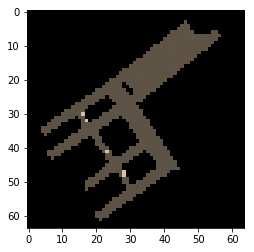

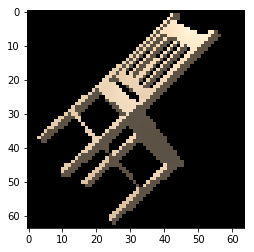

Test data 44
true orientation=  [ 0.51417231  0.71914641  0.467392    0.84250079 -0.52557861 -0.11815051]
prediction orientation =  [ 3663.4526  3912.628   2689.417   3834.81   -3689.8193  -433.1392]


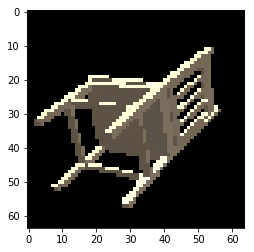

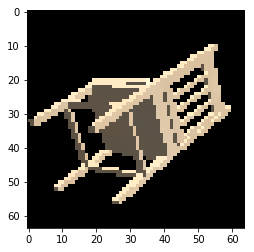

Test data 45
true orientation=  [ 0.62805787 -0.51445475  0.58384897  0.62293994  0.78203938  0.01898014]
prediction orientation =  [ 3030.0037 -2878.0833  3425.7805  5144.5913  6822.6255  1135.6064]


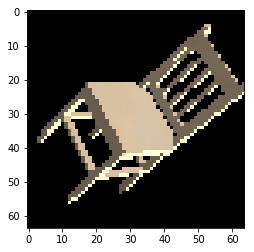

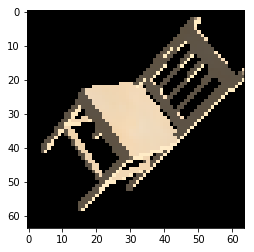

Test data 46
true orientation=  [ 0.35068734  0.19663209  0.91561685 -0.08010484  0.98042358 -0.17986889]
prediction orientation =  [ 3693.9624   1745.9436   8317.308     575.77826 15017.163   -1233.9851 ]


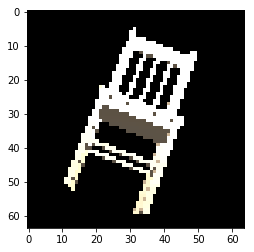

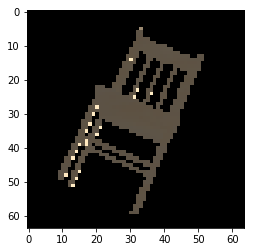

Test data 47
true orientation=  [ 0.40160612  0.00815938  0.91577614 -0.87493541  0.29883393  0.38103321]
prediction orientation =  [ 6243.743   -624.6496 11285.622  -6756.0703  1555.32    3461.6008]


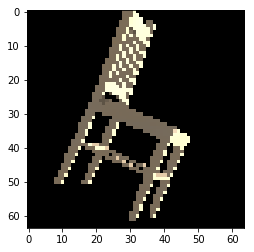

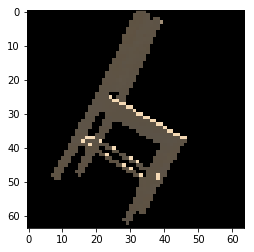

Test data 48
true orientation=  [-0.00391026  0.95497502  0.29666044 -0.38852492 -0.27480684  0.87950531]
prediction orientation =  [  33.368294 1395.4277    482.60233  -537.9671   -122.12933  1236.8214  ]


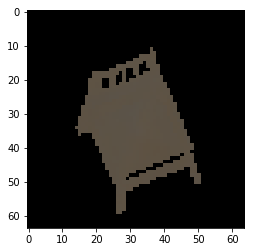

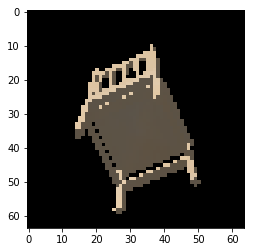

Test data 49
true orientation=  [ 0.7015408   0.45217133 -0.55080086  0.43216382 -0.88451484 -0.17569271]
prediction orientation =  [ 1726.1946    608.49713 -1423.3706    866.6574  -1695.0815   -483.94516]


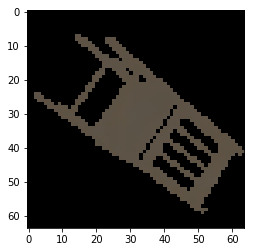

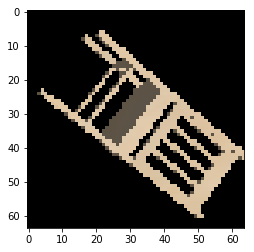

Test data 50
true orientation=  [-0.83244551  0.01137107 -0.55399023 -0.45753847 -0.57806376  0.67564846]
prediction orientation =  [-7973.1504     56.28665 -5510.2856  -4052.9607  -3357.0972   5522.179  ]


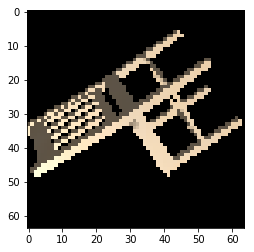

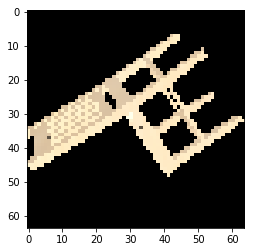

Test data 51
true orientation=  [-0.60795473 -0.63131259 -0.48149295  0.79356279 -0.46369516 -0.39401129]
prediction orientation =  [-4478.1553 -4460.8213 -2765.9915  7215.3486 -5590.349  -4305.063 ]


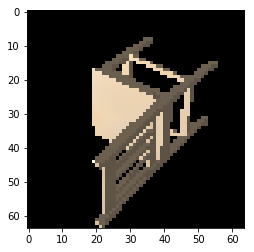

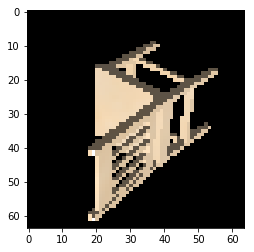

Test data 52
true orientation=  [-0.00644877 -0.99918464 -0.03985572  0.95528186  0.00562727 -0.29564319]
prediction orientation =  [ -547.77106 -4470.695     -72.74367  6648.718   -1052.8867  -3165.6982 ]


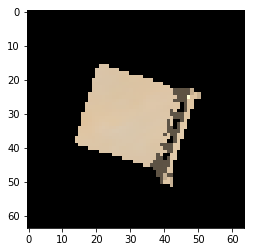

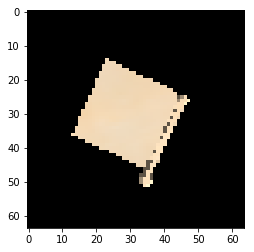

Test data 53
true orientation=  [-0.93801037  0.07294124  0.33884529 -0.11463746  0.85729981 -0.50189171]
prediction orientation =  [-13544.434      217.64365   5410.888     -369.50412  10271.212
  -6798.9053 ]


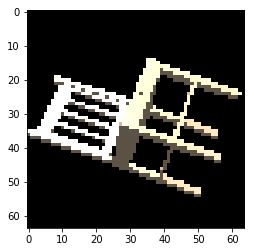

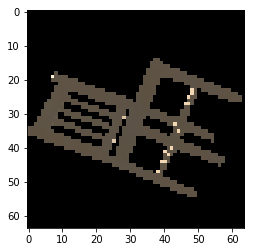

Test data 54
true orientation=  [ 0.236835    0.92469996  0.29805901  0.60924286 -0.38032611  0.69582698]
prediction orientation =  [ 217.73044 3217.6245   829.7647  -370.18204 -266.70062  118.60949]


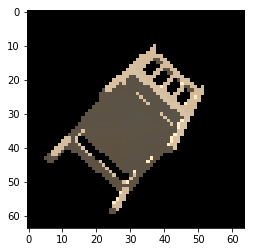

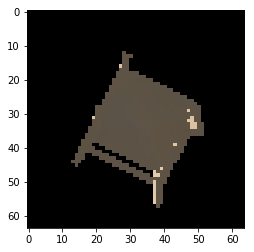

Test data 55
true orientation=  [-0.31540994  0.30853654 -0.89739722 -0.03895084  0.94066215  0.3371017 ]
prediction orientation =  [-2508.5935   2329.5908  -6390.5073    191.12335 11570.626    2852.1545 ]


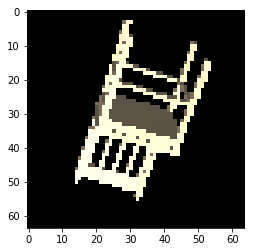

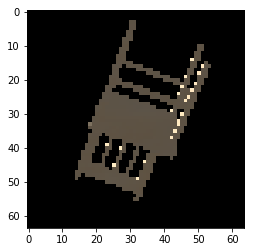

Test data 56
true orientation=  [ 0.89991339 -0.04279607 -0.43396358 -0.39512689 -0.50102255 -0.76996827]
prediction orientation =  [12543.874  -1151.0687 -5653.4087 -4888.6494 -6256.337  -7896.6436]


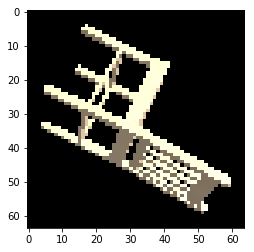

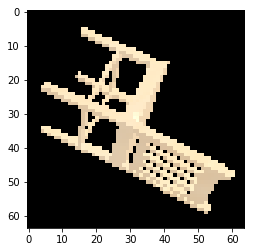

Test data 57
true orientation=  [-0.04339767 -0.48255926  0.87478752  0.15086986 -0.86873632 -0.47173667]
prediction orientation =  [  998.78937 -6807.594    9848.657     740.46686 -7515.8726  -4609.081  ]


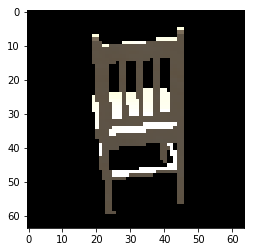

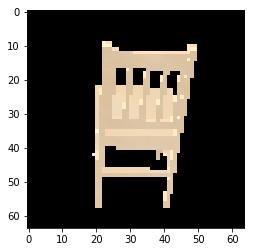

Test data 58
true orientation=  [ 0.74456183 -0.52293598 -0.41492848 -0.66218256 -0.65725671 -0.3598998 ]
prediction orientation =  [ 7635.273  -6396.8315 -5400.5854 -5149.042  -5343.3535 -1484.0254]


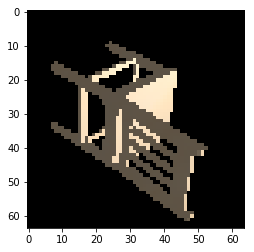

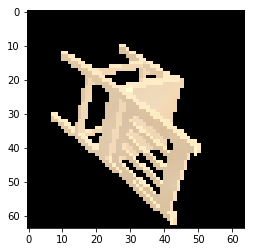

Test data 59
true orientation=  [-0.12334653  0.64206012 -0.75666666 -0.91714249 -0.36495748 -0.16017396]
prediction orientation =  [ -543.84766  1126.8579  -2642.3577  -2704.81     -760.9419   -781.8731 ]


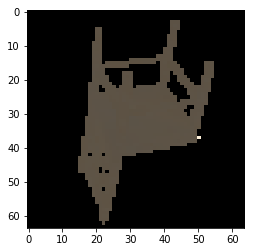

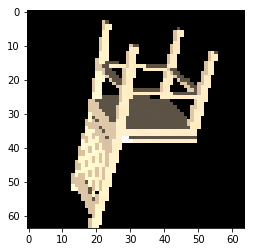

Test data 60
true orientation=  [-0.2497817   0.94973979  0.18868871  0.53718352  0.29804365 -0.7890525 ]
prediction orientation =  [ -637.805   3858.7068  1018.8095  1639.5009  1671.9166 -2251.8196]


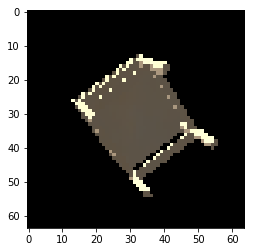

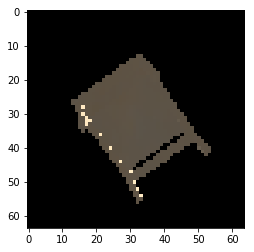

Test data 61
true orientation=  [-0.47806307 -0.42863275 -0.76663529 -0.48033035  0.8583394  -0.18037804]
prediction orientation =  [-4091.9717 -5668.5063 -7293.7144 -6206.754   9219.733  -1071.2856]


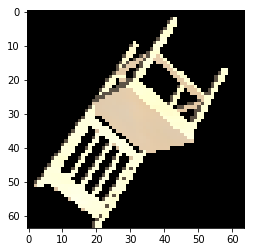

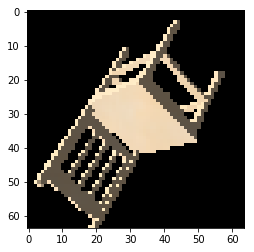

Test data 62
true orientation=  [ 0.90703681 -0.16064692 -0.3892002   0.04621745 -0.88078095  0.47126306]
prediction orientation =  [ 3720.3376   -1358.5692   -1063.3722    -426.03156  -2695.5764
   -12.381204]


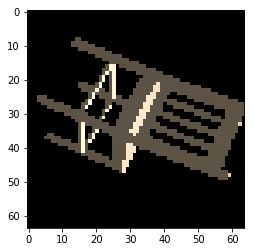

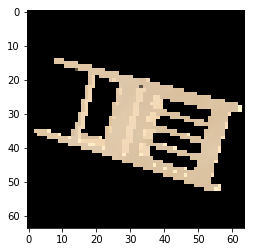

Test data 63
true orientation=  [-0.14471949  0.4553773   0.87845762  0.08966263 -0.87811588  0.46997141]
prediction orientation =  [ -267.91348    573.01904   2558.153      -66.598885 -1329.2029
   306.54904 ]


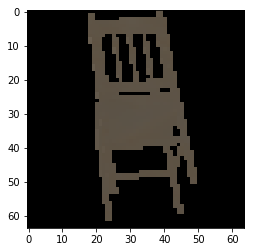

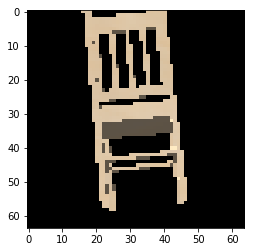

Test data 64
true orientation=  [-0.70500179  0.56407379 -0.42987584 -0.04161517 -0.63799562 -0.76891467]
prediction orientation =  [-5117.342   1912.5781 -3149.5425   586.4223 -4528.0576 -4479.4478]


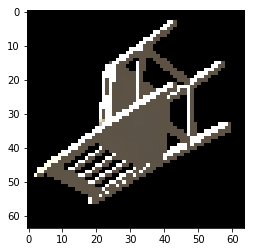

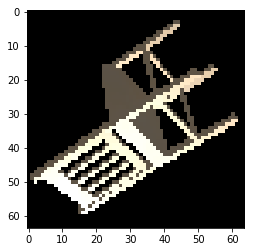

Test data 65
true orientation=  [-0.5345993   0.13082381  0.83491839 -0.24168608  0.92301654 -0.29937986]
prediction orientation =  [-8518.798   1332.555  11592.648  -2485.2693  6788.5244 -3386.1702]


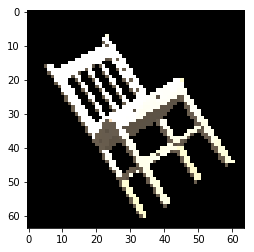

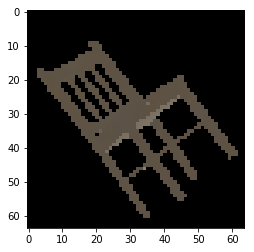

Test data 66
true orientation=  [-0.67688203  0.71450973 -0.17693664 -0.65754627 -0.69496775 -0.29095143]
prediction orientation =  [-1835.2316   1034.0673   -706.8341  -1647.7715   -366.38577  -220.12492]


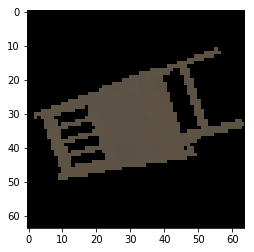

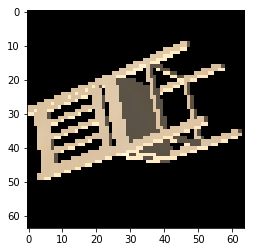

Test data 67
true orientation=  [-0.34053652  0.74083802  0.57895933  0.79003941 -0.10839745  0.60339683]
prediction orientation =  [-2488.7095  6883.457   5318.4985  6861.5566 -1519.9132  5951.5537]


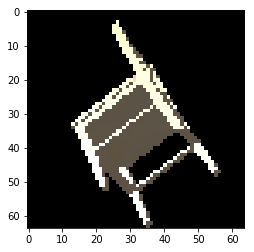

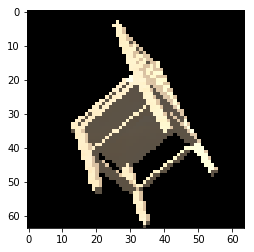

Test data 68
true orientation=  [ 0.90840159 -0.37766069 -0.17938492  0.18151064  0.74273309 -0.64451644]
prediction orientation =  [ 5032.5195 -1991.6545 -2505.5354   889.0855  4562.043  -4797.3438]


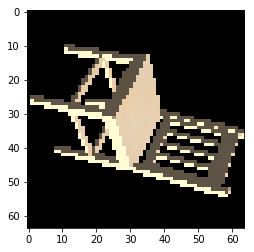

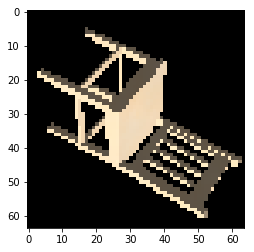

Test data 69
true orientation=  [ 0.40916713  0.91143503  0.04322538 -0.90496473  0.3992915   0.14698687]
prediction orientation =  [  750.1577    834.0262    132.46733 -1367.3252    726.70844   795.9243 ]


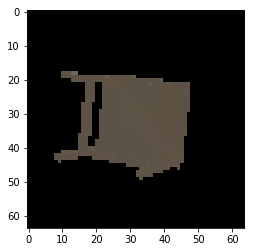

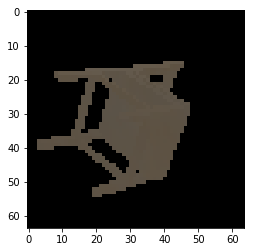

Test data 70
true orientation=  [-0.06843427  0.64676099 -0.75961633  0.6906895  -0.51871133 -0.50387158]
prediction orientation =  [ -196.21527  1894.9568  -2005.315    2135.0203  -1600.7474  -1702.9028 ]


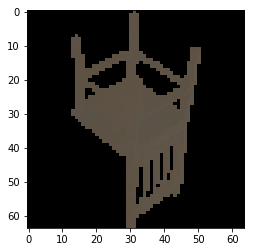

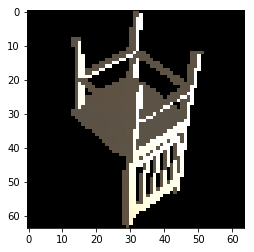

Test data 71
true orientation=  [-0.69367874  0.1380954  -0.70692253  0.67697659  0.46018427 -0.57439807]
prediction orientation =  [-3403.664     307.00717 -3318.8162   3711.4036  -2657.0686  -3792.1943 ]


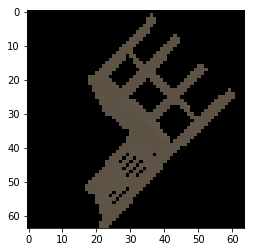

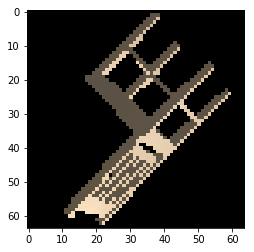

Test data 72
true orientation=  [ 0.95892463  0.27002208 -0.08690014 -0.28364174  0.90918706 -0.30483806]
prediction orientation =  [ 6076.691   2869.94    -817.2157 -3219.703   5305.9365 -2176.074 ]


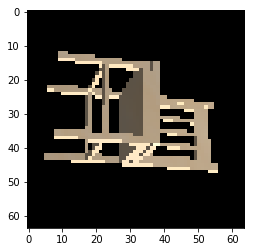

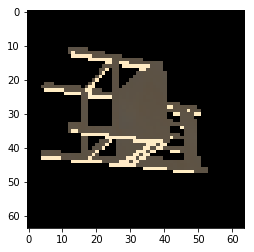

Test data 73
true orientation=  [ 0.09962915  0.93103029 -0.35107923  0.74043305  0.16633429  0.65122331]
prediction orientation =  [ 393.26343 2524.43    -723.29364 2327.3557   782.84546 3171.4033 ]


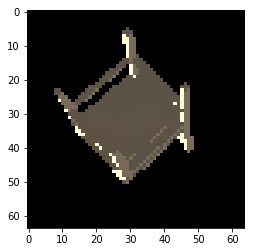

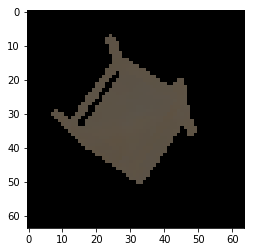

Test data 74
true orientation=  [-0.66412107 -0.34549841 -0.66300381 -0.73241157  0.47865491  0.48421356]
prediction orientation =  [-5334.01   -1583.8389 -4809.418  -4983.6973  2563.4258  4057.1392]


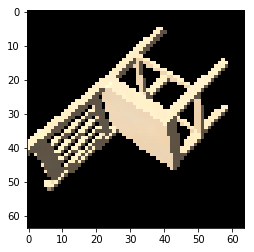

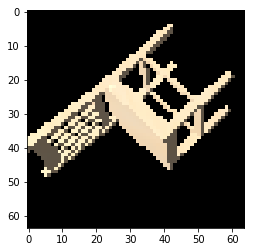

Test data 75
true orientation=  [ 0.14383443  0.98699846  0.07173355 -0.2770663   0.10975275 -0.95456199]
prediction orientation =  [   21.223227  3065.276      314.08377   -449.55954    162.2696
 -2019.3008  ]


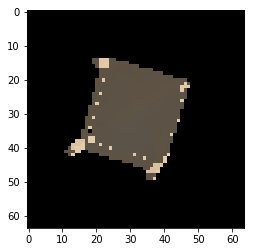

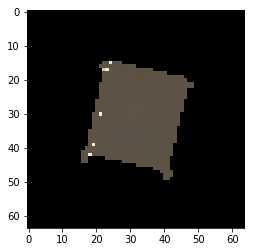

Test data 76
true orientation=  [-0.83072582  0.26967137 -0.48700305 -0.50437946  0.00559409  0.86346399]
prediction orientation =  [-6341.876    481.8712 -4993.2305 -6618.0264   598.2951  7545.887 ]


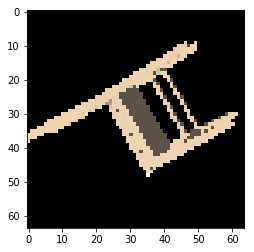

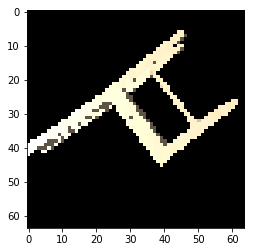

Test data 77
true orientation=  [-0.5442769   0.45556676  0.70442997 -0.82455662 -0.13587087 -0.54922262]
prediction orientation =  [-6240.759   3196.454   5177.13   -3774.0278 -1627.0568 -2761.4639]


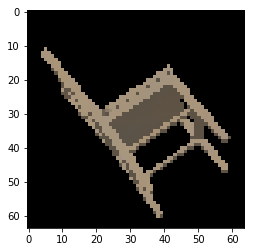

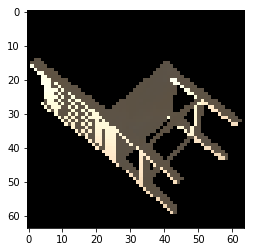

Test data 78
true orientation=  [ 0.19921345 -0.97875265 -0.04855151  0.41466212  0.03930188  0.90912633]
prediction orientation =  [  752.3162   -5079.185      297.44492   2294.8635      23.751995
  4493.914   ]


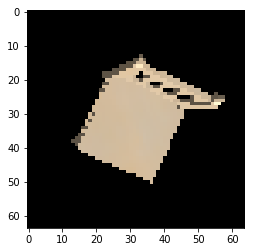

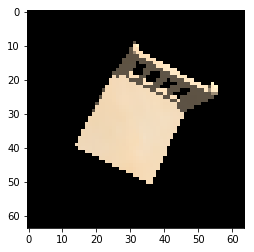

Test data 79
true orientation=  [-0.74661353  0.66471173 -0.02695471 -0.21095419 -0.19813108  0.95720552]
prediction orientation =  [-7089.0625   6210.5835    415.62506 -3314.1216  -2482.5576   6095.339  ]


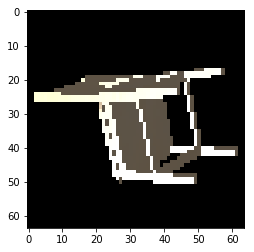

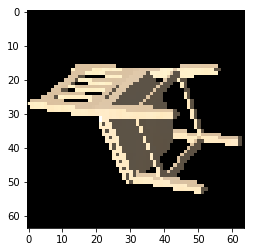

Test data 80
true orientation=  [ 0.38628058 -0.03029514 -0.92188368 -0.84601982  0.3865462  -0.36719546]
prediction orientation =  [  6171.324    -378.7643 -11364.985   -8358.274    2405.448   -4136.919 ]


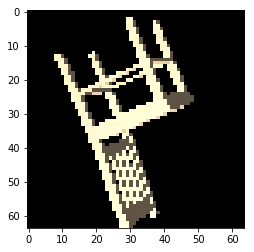

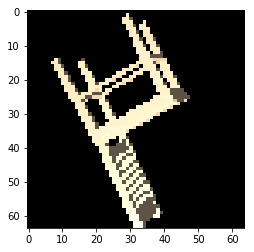

Test data 81
true orientation=  [-0.12361033  0.86852799  0.47997876  0.94055774  0.25673715 -0.22234473]
prediction orientation =  [ -726.40656  4631.7495   2807.882    4420.779    2855.0977  -2155.9414 ]


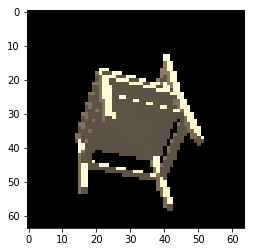

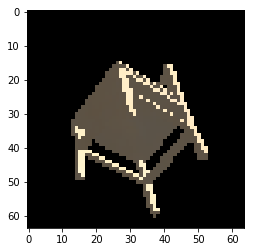

Test data 82
true orientation=  [-0.85466437  0.49675345 -0.15094641  0.37455631  0.38862001 -0.84183256]
prediction orientation =  [-6030.1914   4694.9204    127.79584  2364.2415   1112.0242  -6194.854  ]


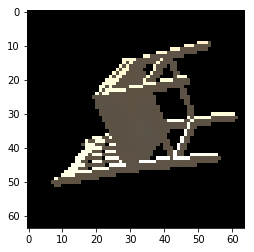

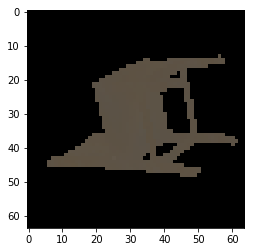

Test data 83
true orientation=  [-0.70941188  0.70477006 -0.00582597 -0.10346601 -0.0959637   0.9899928 ]
prediction orientation =  [-6094.757    5345.6235    848.72003 -1245.5354   -562.94946  6787.8633 ]


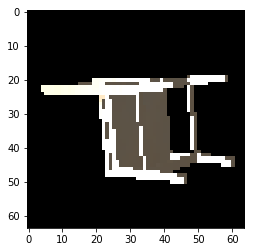

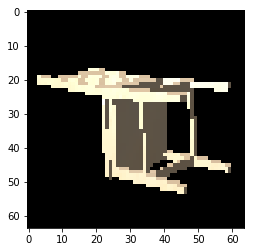

Test data 84
true orientation=  [-0.35904333 -0.54445674 -0.75805985  0.74480002 -0.65662055  0.11883759]
prediction orientation =  [-3058.2632   -2910.8394   -3993.3154    5768.914    -4330.2812
    25.255697]


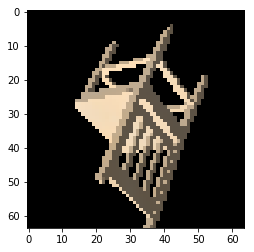

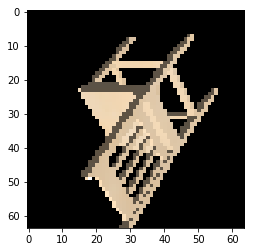

Test data 85
true orientation=  [ 0.40599788 -0.28021749  0.86985279  0.80998243 -0.33043465 -0.48450119]
prediction orientation =  [ 4057.1133 -3062.946   8901.24    9381.259  -4182.3774 -5177.3022]


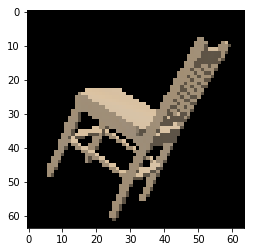

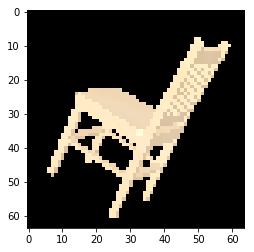

Test data 86
true orientation=  [-0.45115573  0.25537932 -0.85512567  0.88248987 -0.0150595  -0.47009025]
prediction orientation =  [-1789.5863     492.82437  -2779.26      5072.1025     -69.066246
 -3360.4216  ]


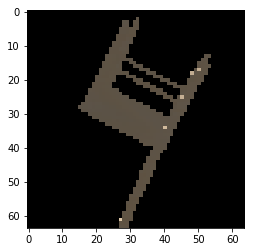

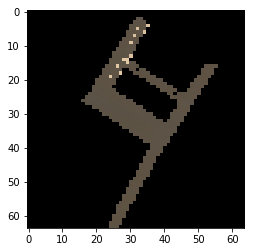

Test data 87
true orientation=  [-0.06783729  0.87500421 -0.47933885 -0.97688169 -0.15588033 -0.14629929]
prediction orientation =  [ -752.5745  7925.3804 -5475.493  -8159.498    634.1142  -417.9705]


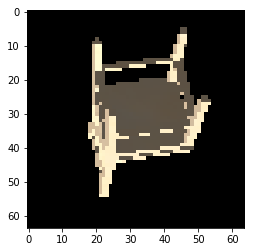

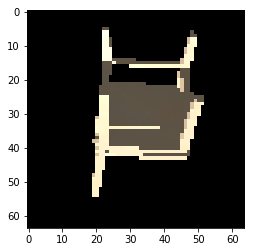

Test data 88
true orientation=  [-0.67232417  0.19626333  0.71376531 -0.05974998 -0.97545469  0.21193889]
prediction orientation =  [-2767.6362   1625.2466   2307.9934   -158.33263 -2347.121     140.88762]


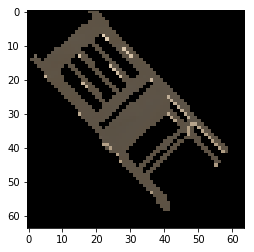

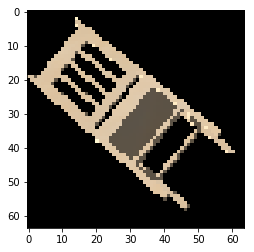

Test data 89
true orientation=  [ 0.02259741 -0.99962914  0.01519666 -0.87000637 -0.02715115 -0.49229233]
prediction orientation =  [  195.51544 -7755.052    -337.63177 -5609.0234    130.22975 -2807.2542 ]


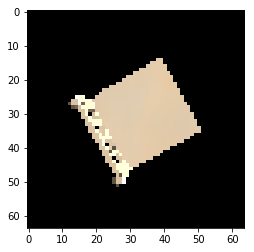

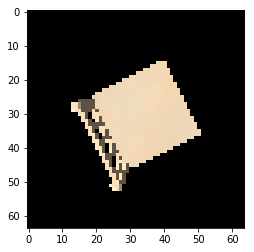

Test data 90
true orientation=  [-0.12346019 -0.98388716  0.1293199  -0.43613932  0.17085432  0.88351078]
prediction orientation =  [-1416.9246 -7175.8877  1220.3016 -3349.1897  2167.619   6014.155 ]


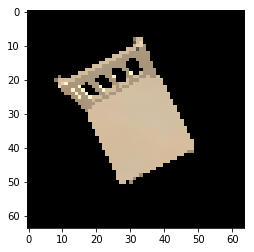

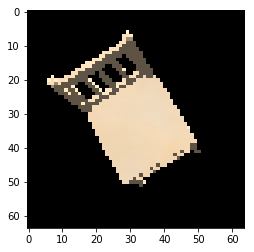

Test data 91
true orientation=  [-0.9637563   0.19411976 -0.18300633  0.19507087  0.98070342  0.01296753]
prediction orientation =  [-7978.2847   1542.3413    469.33344  3804.6294  11779.286   -2316.924  ]


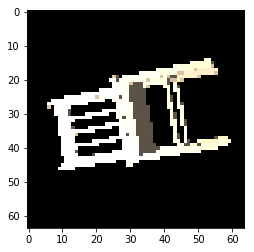

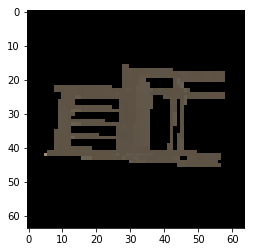

Test data 92
true orientation=  [-0.63449375 -0.32899194 -0.69941546  0.75676493 -0.08033461 -0.64873199]
prediction orientation =  [ -6689.292   -2185.5393  -6629.906   10855.964    2536.0884 -11303.521 ]


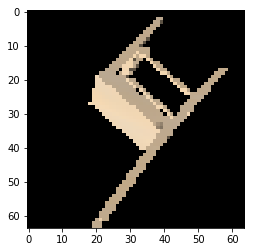

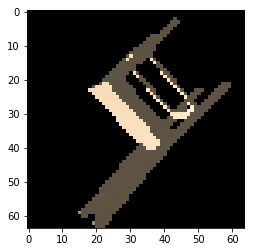

Test data 93
true orientation=  [ 0.87117019  0.30567812  0.3842179   0.46165162 -0.24356088 -0.85296886]
prediction orientation =  [ 5534.3228    596.0859   2782.0051   3763.2583   -941.15765 -7234.9243 ]


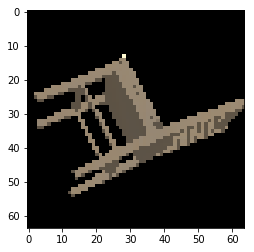

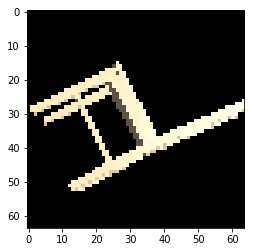

Test data 94
true orientation=  [-0.22626542 -0.65097251  0.72459558 -0.20113809  0.75908026  0.61914508]
prediction orientation =  [-2355.5007 -4495.4946  6623.343  -1410.357   5048.398   4942.7847]


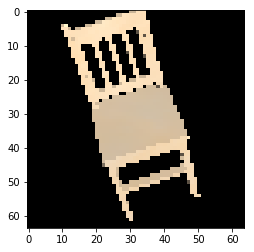

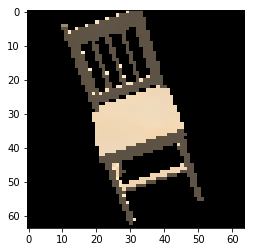

Test data 95
true orientation=  [ 0.36195573 -0.72632366 -0.58433038 -0.62068995 -0.65545696  0.43025593]
prediction orientation =  [ 2262.4038 -4524.6646 -4821.8247 -1840.5781 -4147.3945  2633.6921]


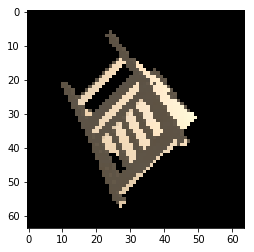

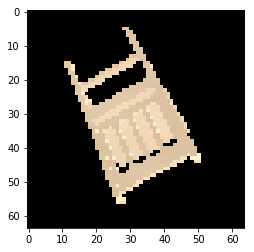

Test data 96
true orientation=  [ 0.17634924  0.76130354 -0.62395342  0.91852493 -0.35515031 -0.17372452]
prediction orientation =  [  455.94604  2112.1377  -2164.504    3991.6438   -876.8939    677.85944]


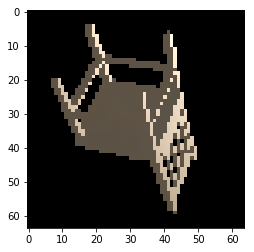

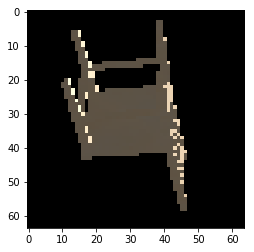

Test data 97
true orientation=  [-0.63720197 -0.76830457  0.0606774  -0.49441818  0.46790419  0.73254101]
prediction orientation =  [-4913.2812 -5810.3076  1107.1205 -2942.4375  4163.0176  5266.786 ]


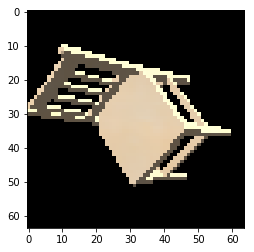

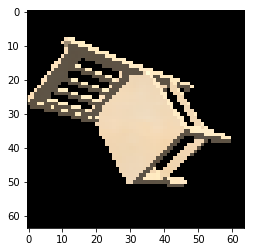

Test data 98
true orientation=  [-0.66026899  0.01171303  0.75093786  0.74096352 -0.15299355  0.65388534]
prediction orientation =  [-6415.895    670.8072  7246.3647  6991.7476 -2222.9717  5621.1836]


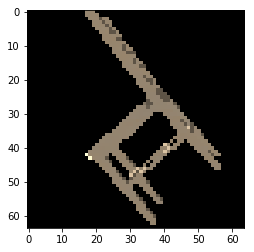

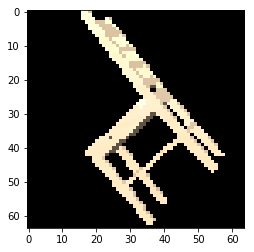

Test data 99
true orientation=  [-0.38751352  0.45397048 -0.80233663 -0.59621165  0.54039572  0.59372059]
prediction orientation =  [-2400.0725  2857.4934 -4597.833  -4126.6836  1773.612   3727.3762]


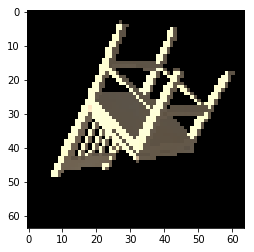

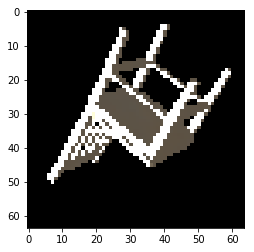

Just for crosschecking, mse and rmse calculated outside of the keras
mse =  0.016617374734135465
rmse = 0.12890839667816625


In [12]:
target_type = 'vectorOrientations'
image_size = 64

#Load saved model
#Please change the model_filename to load the correct model
model_filename = "trained_model/CNN_model_"+target_type+"10april"

#Run Prediction
predictions = main_get_prediction(target_type,model_filename,x_test, y_test)

#print images from pair of true data and prediction
show_images(y_test,predictions,x_test,target_type,image_size)

#Just validation of manually calculated mse and RMSE
mse,rmse = calculate_accuracy(y_test,predictions)
print("Just for crosschecking, mse and rmse calculated outside of the keras")
print('mse = ', mse)
print('rmse =', rmse)

## Running with Quaternions (not to be used for at the moment)